In [61]:
%load_ext autoreload
# %reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pycaret.regression import *
from pathlib import Path

In [63]:
%autoreload
import sys
sys.path.append(sys.path[0][0:-4] + 'mikael')
from pipeline import Pipin
pipin = Pipin()

In [4]:
df = pipin.get_combined_datasets()
categorical_features = pipin.get_categorical_features(df)

In [13]:
s = setup(df, target="pv_measurement", normalize=True, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=pipin.get_irrelevant_features(), index=False)

,Description,Value
0,Session id,3408
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(81190, 53)"
4,Transformed data shape,"(81190, 56)"
5,Transformed train set shape,"(56833, 56)"
6,Transformed test set shape,"(24357, 56)"
7,Ignore features,4
8,Ordinal features,3
9,Numeric features,44


In [14]:
lightgbm = s.create_model('lightgbm')
# lightgbm = s.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91.6115,65645.1847,256.2132,0.9045,1.0304,8.5501
1,89.2646,65160.3165,255.2652,0.8946,1.0353,1.7151
2,93.5606,75225.5609,274.2728,0.8950,1.0369,1.2916
3,89.8038,71833.1416,268.0171,0.8906,1.0365,1.4823
4,94.3023,73659.6104,271.4030,0.8841,1.0511,1.2934
5,93.1496,75156.8531,274.1475,0.8813,1.0200,1.3673
6,95.9741,71235.4739,266.8997,0.8959,0.9859,1.2365
7,92.7328,69075.2796,262.8218,0.8934,1.0243,1.2542
8,90.8789,64353.3421,253.6796,0.9032,1.0497,1.6478


In [15]:
s.finalize_model(lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['direct_rad:W',
                                             'snow_density:kgm3', 'prob_rime:p',
                                             'snow_melt_10min:mm',
                                             'visibility:m', 'sun_azimuth:d',
                                             'air_density_2m:kgm3',
                                             'ceiling_height_agl:m',
                                             'direct_rad_1h:J',
                                             'clear_sky_rad:W',
                                             'fresh_snow_6h:cm', 't_1000hPa:K',
                                             'diffuse_rad_1h:J',
                                             'rain_water:kgm2',
                                             'eff...
                                             'precip_type_5min:idx'],
                                    transformer=OneHotEncoder(cols=['dew_or_rime:idx',
                                                                    'precip_type_5min:idx'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=3408))])

In [16]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

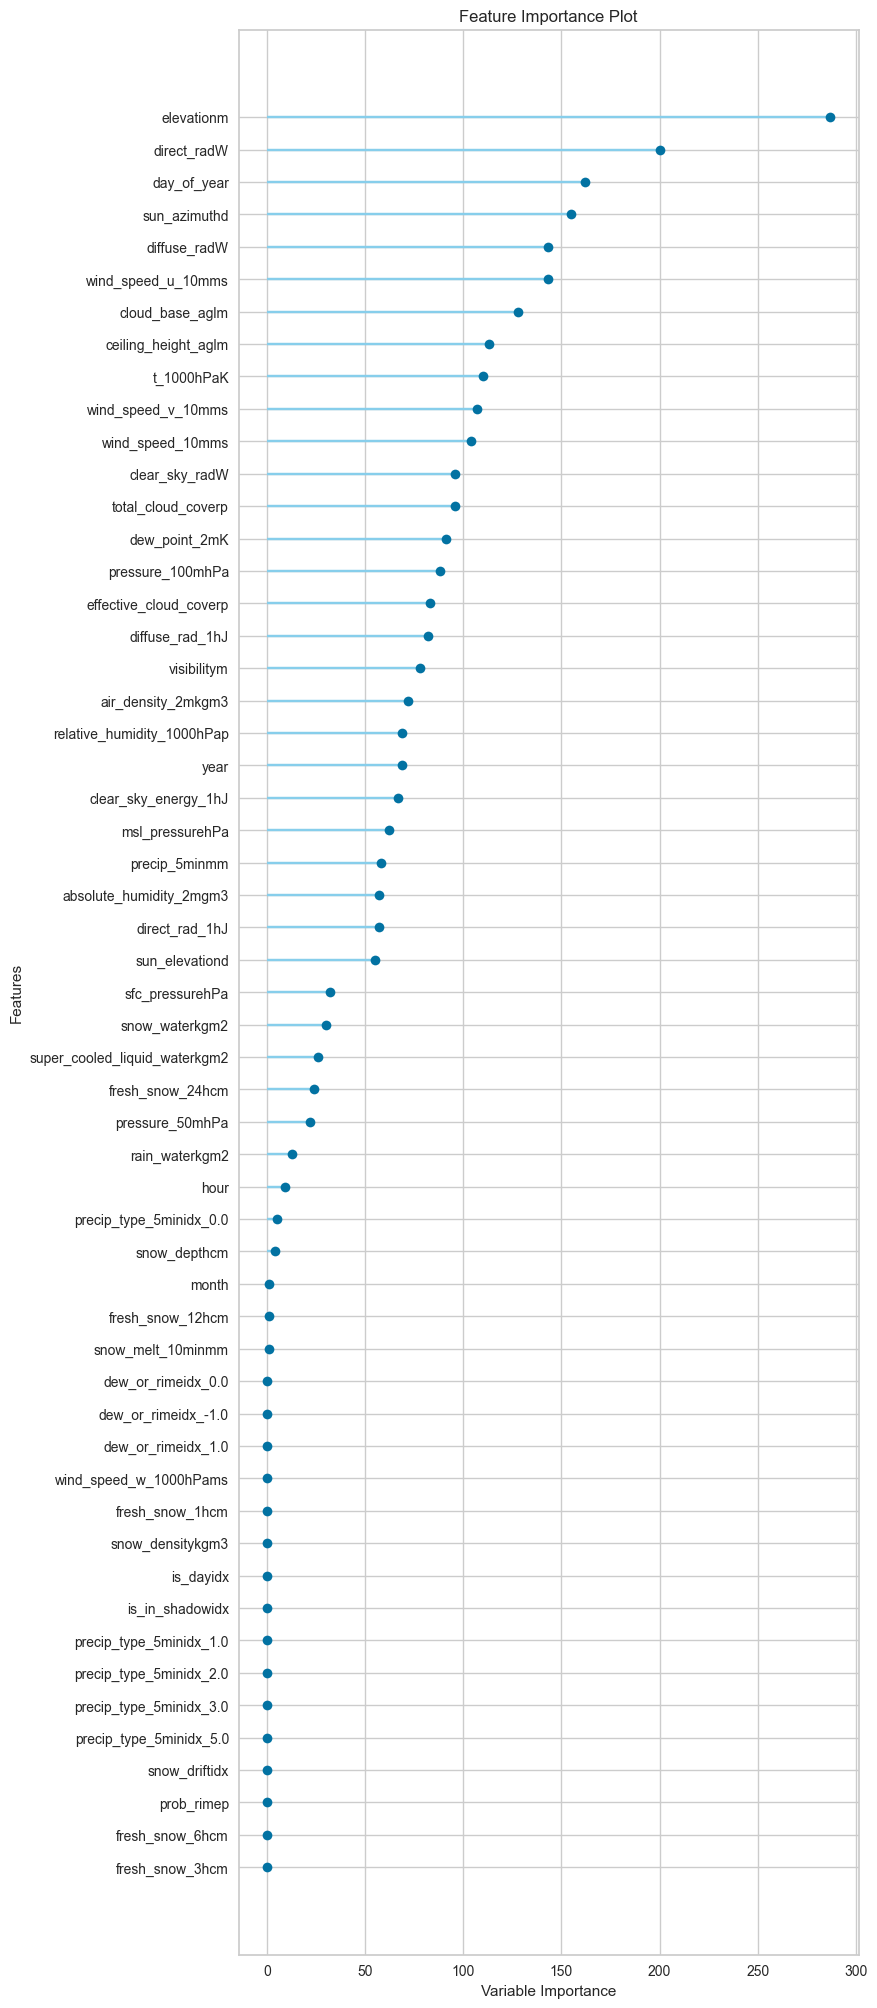

In [17]:
plot_model(lightgbm, plot="feature_all")

In [ ]:
# gump = s.create_
# model('et')
# s.finalize_model(gump)

In [46]:
test_data = pipin.get_combined_test_data()
# test_data = pipin.get_test_data("A")

In [47]:

def get_unique_filename(base_name, folder = "submissions"):
    file_path = Path(folder) / f"{base_name}.csv"
    count = 1
    while file_path.exists():
        file_path = Path(folder) / f"{base_name}_{count}.csv"
        count += 1
    return str(file_path)

In [48]:
# res_gump = predict_model(gump, test_data)
# res_gump= res_gump[["prediction_label"]].rename(columns={"prediction_label": "prediction"}).rename_axis(index="id")
# res_gump.to_csv(get_unique_filename("gump"), header=True)

In [54]:
res_goose = predict_model(lightgbm, test_data)
res_goose = res_goose[["prediction_label"]].rename(columns={"prediction_label": "prediction"}).rename_axis(index="id")
res_goose.to_csv(get_unique_filename('lightgbm'))
save_model(lightgbm, model_name=get_unique_filename('lightgbm', "models"))
res_goose.head(20)


Transformation Pipeline and Model Successfully Saved


,prediction
id,
0,2.054959
1,2.054959
2,1.767246
3,31.137444
4,337.391310
5,950.030621
6,1723.405415
7,2443.959698
8,2631.353736


In [65]:
print("done", res_goose.shape)
pipin.compare_mae(res_goose)


done (2160, 1)


320.869288396756